# Medicare Fraud - Inpatient Exploratory Data Analysis

Mustapha Mbengue, Peyton Nash, Bradley Stoller, Kyler Rosen

3/9/25

Purpose: Conducts exploratory data analysis on the inpatient data.

### Setup

In [48]:
# Import libraries
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BENE11090,CLM56552,2009-06-21,2009-06-22,PRV55544,1000,PHY405478,NaN,NaN,2009-06-21,...,34590,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BENE11099,CLM52386,2009-05-23,2009-05-26,PRV53275,3000,PHY425441,NaN,NaN,2009-05-23,...,34690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BENE11127,CLM55284,2009-06-12,2009-06-23,PRV54989,4000,PHY357865,NaN,NaN,2009-06-12,...,25000,4280,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BENE11176,CLM55569,2009-06-14,2009-06-14,PRV57214,15000,PHY405200,PHY432053,NaN,2009-06-14,...,2760,486,99591,5856,4513.0,NaN,NaN,NaN,NaN,NaN
9,BENE11218,CLM65115,2009-08-24,2009-08-31,PRV52117,19000,PHY335369,PHY344060,NaN,2009-08-24,...,78720,49121,V850,NaN,9671.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Read in data
df = pd.read_csv("/Users/moulang/Downloads/data/Test_Inpatientdata-1542969243754.csv")
df_train = pd.read_csv("/Users/moulang/Downloads/data/Train_Inpatientdata-1542865627584.csv")
df_app = pd.read_csv("/Users/moulang/Downloads/data/inpatient_appended.csv")
df.iloc[:20]

V-codes/Z-codes in ICD-9/10, which means it refers to encounters related to aftercare, follow-ups, or general medical services, rather than an acute illness or injury.

ICD-9-CM codes (e.g., 327.23) consist of:

First three digits → Broad disease category

Decimal point → Separates main category from subcategory

Last two digits → More specific details about the condition

ICD-10-CM codes (e.g., G47.33) are alphanumeric and follow a different structure.

##data set needs to be modified to better rep pateint codes (ie 37533 -> 373.33)





In [49]:
def full_eda(df):
    print("\n###  DATA INSPECTION ###")
    inspect_data(df)
    
    print("\n###  CHECKING MISSING VALUES ###")
    missing_summary = mvs(df)
    print(missing_summary)

    print("\n=====  CHECKING DUPLICATES =====")
    check_duplicates(df)

    print("\n=====  COLUMN TYPE SUMMARY =====")
    cat_cols, num_cols = col_sum(df)

    print("\n=====  PLOTTING NUMERICAL DISTRIBUTIONS =====")
    num_dit(df, num_cols)
    print("\n===== BOXPLOT =====")
    boxplt(df, num_cols)

    print("\n=====  PLOTTING CATEGORICAL DISTRIBUTIONS =====")
    cat_cnt(df, cat_cols)

    print("\n=====  DETECTING OUTLIERS =====")
    outliers = det_out(df, num_cols)
    print("\n--- Outliers Detected ---")
    print(outliers)

def boxplt(df, num_cols):
    """Plots boxplots for numerical columns to detect outliers."""
    for col in num_cols:
        if df[col].notnull().sum() > 0:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f"Box Plot for {col}")
            plt.show()

def check_duplicates(df):
    """Returns the count of duplicate rows."""
    duplicate_count = df.duplicated().sum()
    print(f"\n--- Number of Duplicate Rows: {duplicate_count} ---")
    return duplicate_count
def mvs(df):
    """Returns the count and percentage of missing values per column."""
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
    print("\n--- Missing Values Summary ---")
    return missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

def inspect_data(df):
    """Displays basic info about the dataset."""
    print("\n--- Dataset Information ---")
    print(df.info())
    print("\n### Summary Statistics ###")
    print(df.describe(include='all'))
def col_sum(df):
    """Returns the count of categorical and numerical columns."""
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    print("\n--- Column Summary ---")
    print(f"Categorical Columns ({len(cat_cols)}): {cat_cols}")
    print("\n--- Column Summary ---")
    print(f"Numerical Columns ({len(num_cols)}): {num_cols}")
    
    return cat_cols, num_cols
def num_dit(df, num_cols):
    """Plots histograms of numerical columns."""
   
    df[num_cols].hist(figsize=(15, 12), bins=30)
    plt.suptitle("Numerical Feature Distributions")
    plt.show()

"""def nhm(df, num_cols):
    Plots correlation heatmap for numerical variables.
    plt.figure(figsize=(15, 12))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()"""
def cat_cnt(df, cat_cols):
    """Plots countplots for categorical columns, showing only the top 15 categories."""
    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        top_15 = df[col].value_counts().nlargest(15).index  # Select top 15 categories
        sns.countplot(y=df[col], order=top_15)
        plt.title(f"Top 15 Count Plot for {col}")
        plt.show()
def det_out(df, num_cols):
    """Detects outliers using the IQR method."""
    outlier_dict = {}
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_dict[col] = len(outliers)
    
    return outlier_dict,IQR



### TEST DATA EDA ###

###  DATA INSPECTION ###

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  9551 non-null   object 
 1   ClaimID                 9551 non-null   object 
 2   ClaimStartDt            9551 non-null   object 
 3   ClaimEndDt              9551 non-null   object 
 4   Provider                9551 non-null   object 
 5   InscClaimAmtReimbursed  9551 non-null   int64  
 6   AttendingPhysician      9520 non-null   object 
 7   OperatingPhysician      5589 non-null   object 
 8   OtherPhysician          1013 non-null   object 
 9   AdmissionDt             9551 non-null   object 
 10  ClmAdmitDiagnosisCode   9551 non-null   object 
 11  DeductibleAmtPaid       9355 non-null   float64
 12  DischargeDt             9551 non-null   object 
 13  DiagnosisGroupC

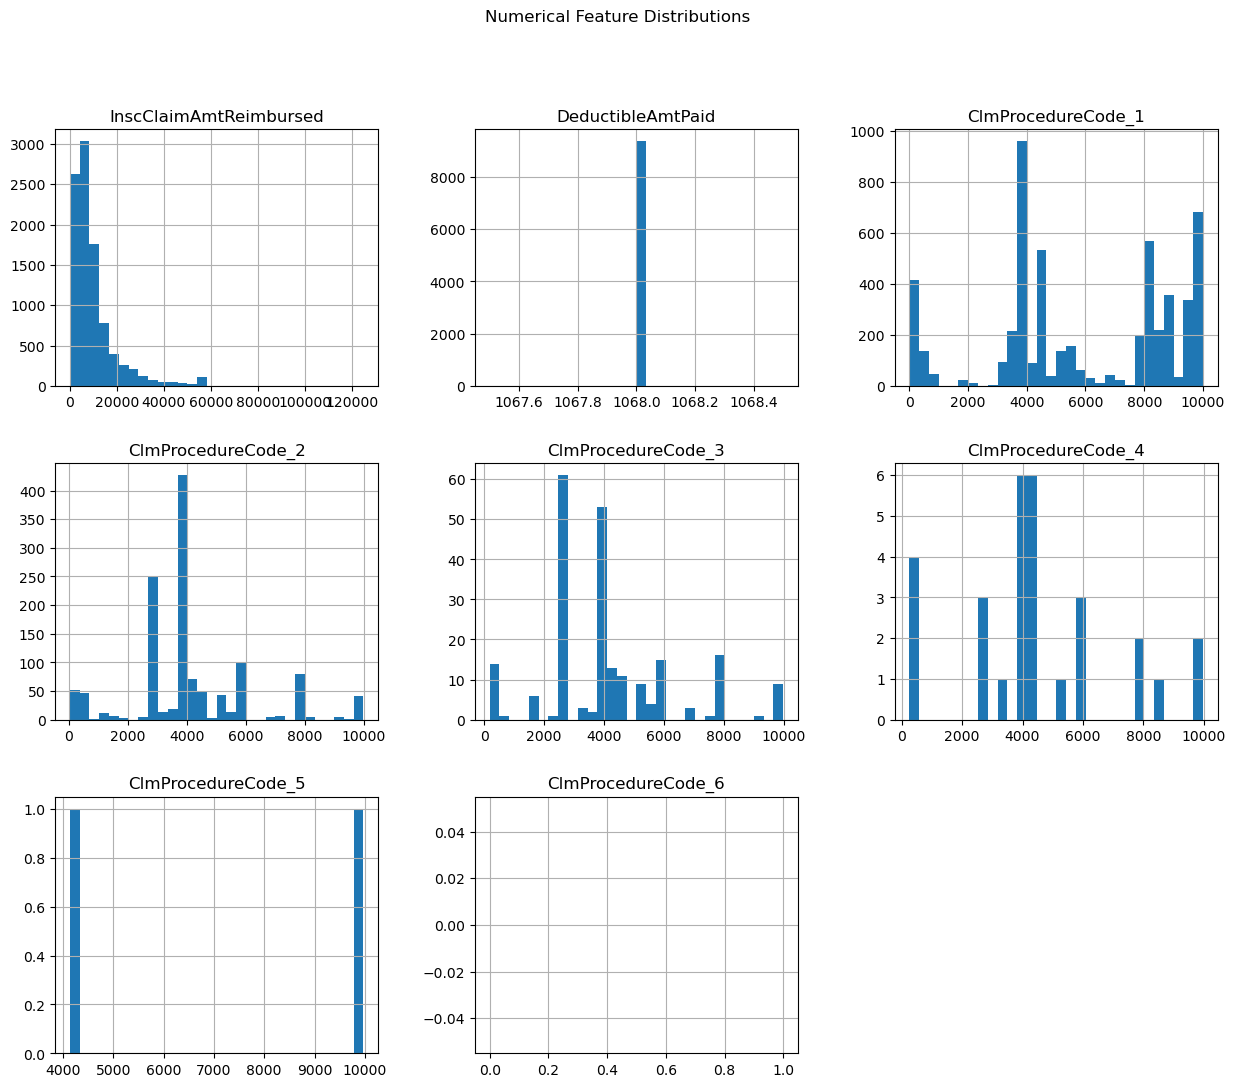


===== BOXPLOT =====


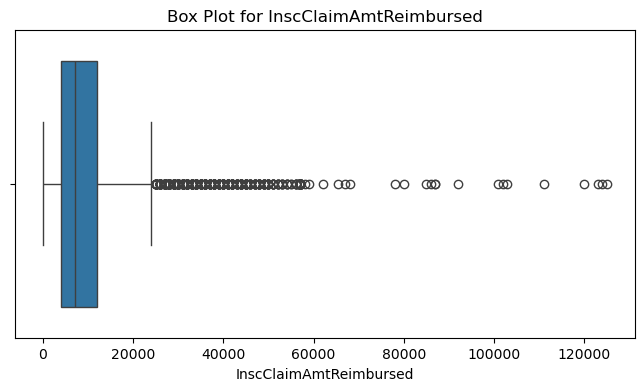

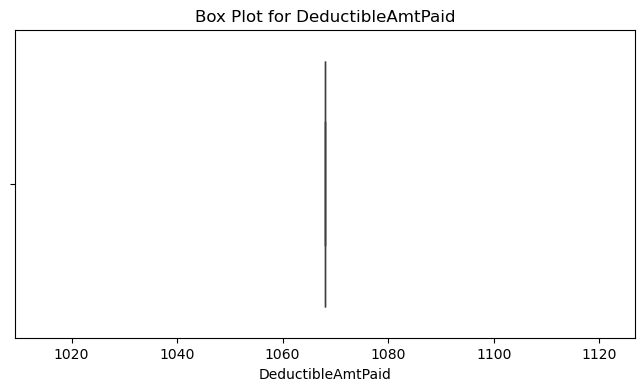

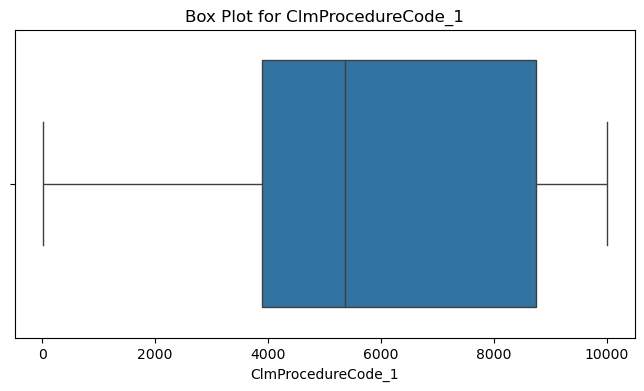

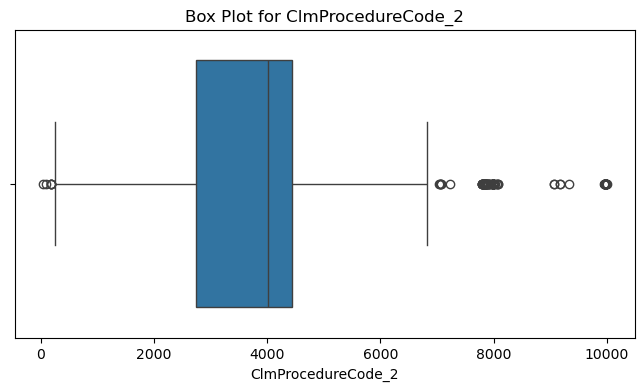

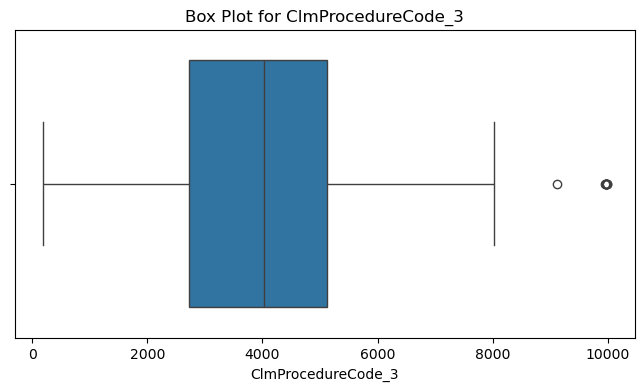

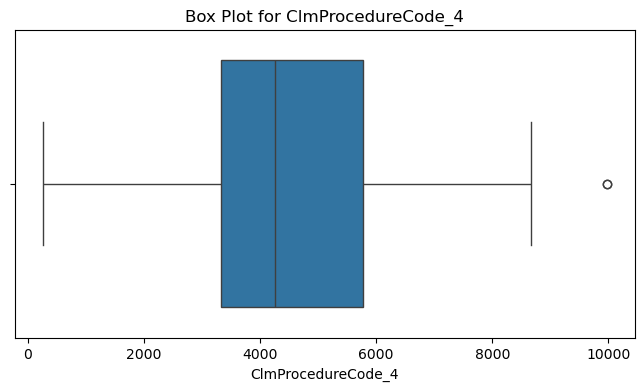

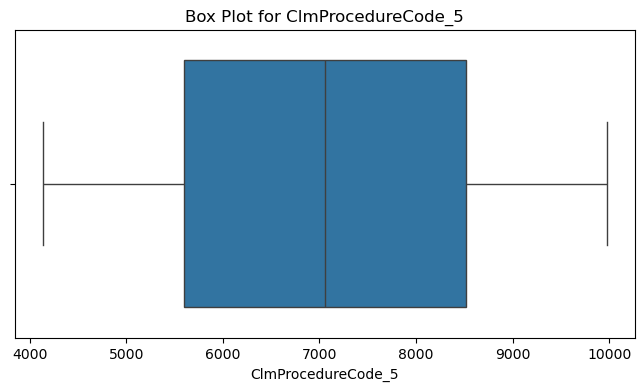


=====  PLOTTING CATEGORICAL DISTRIBUTIONS =====


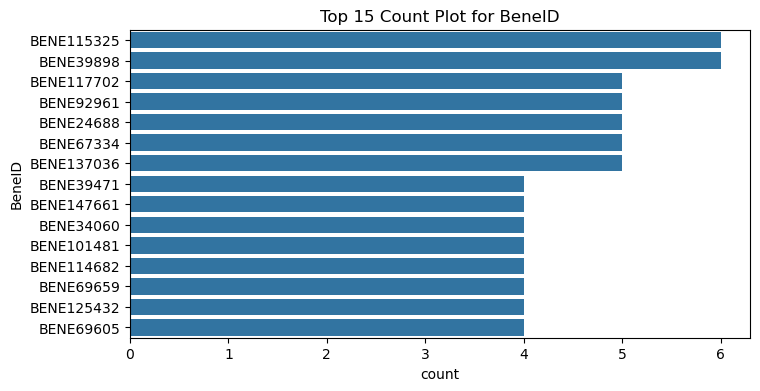

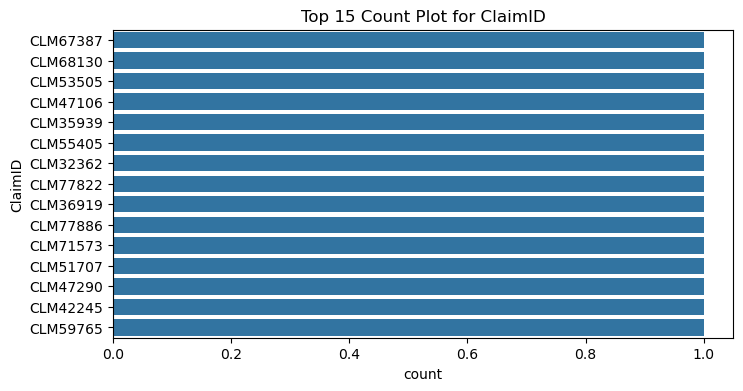

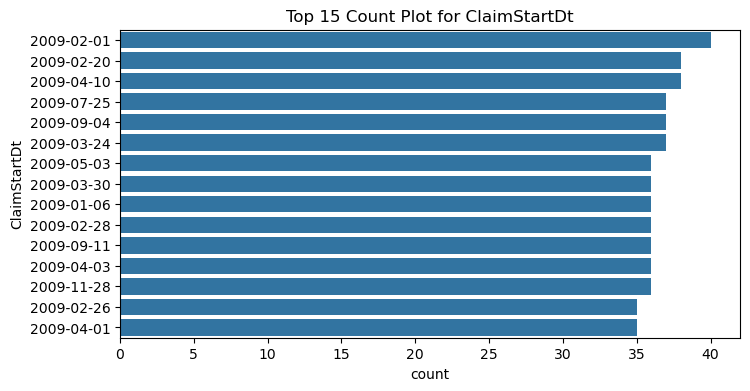

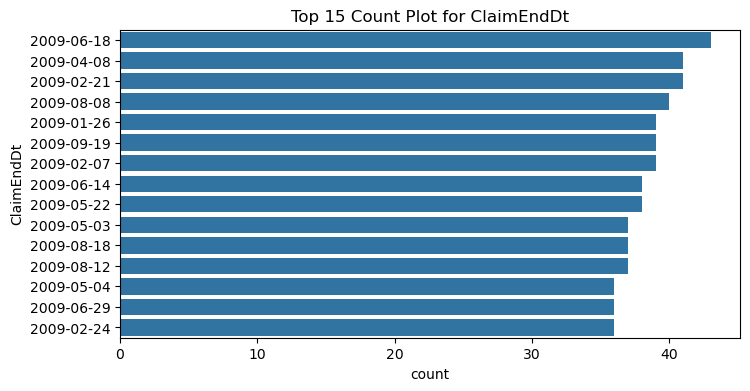

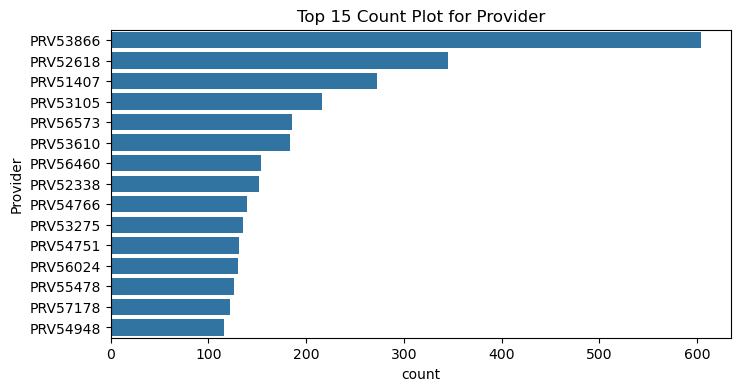

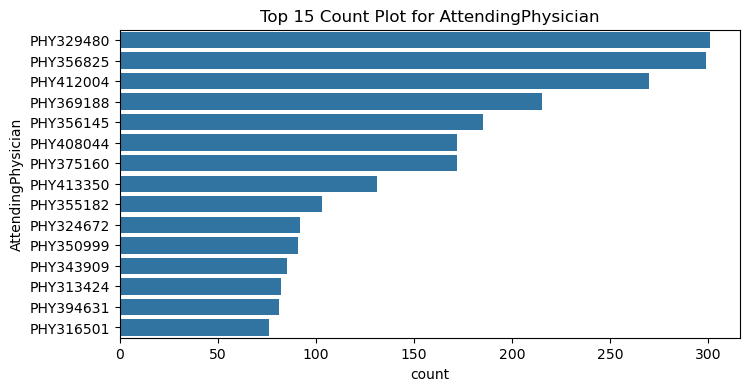

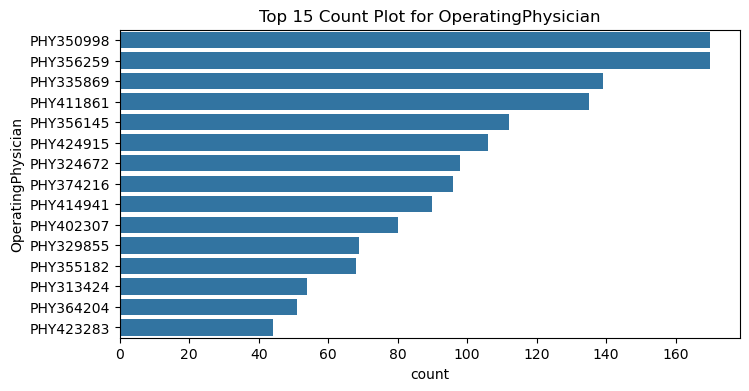

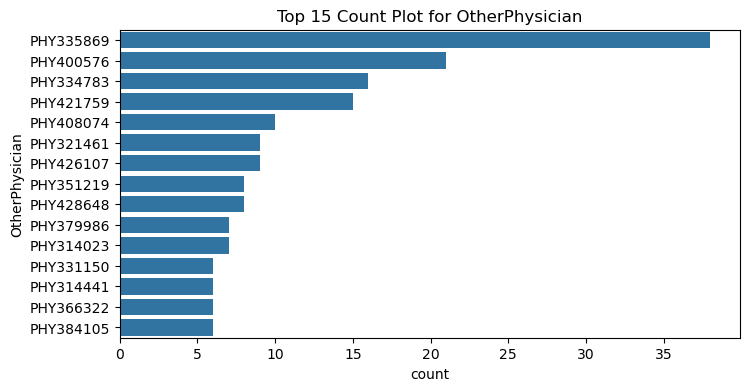

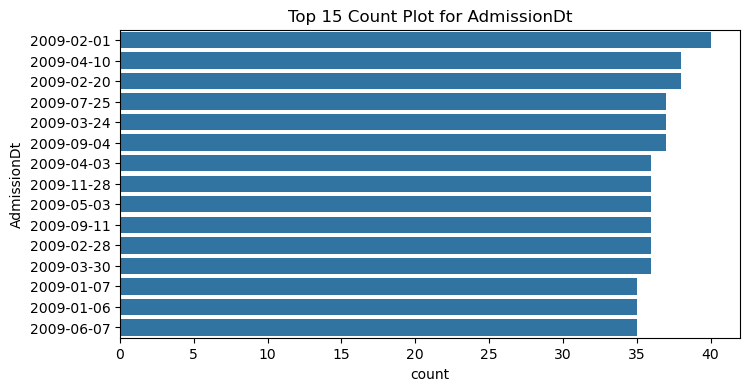

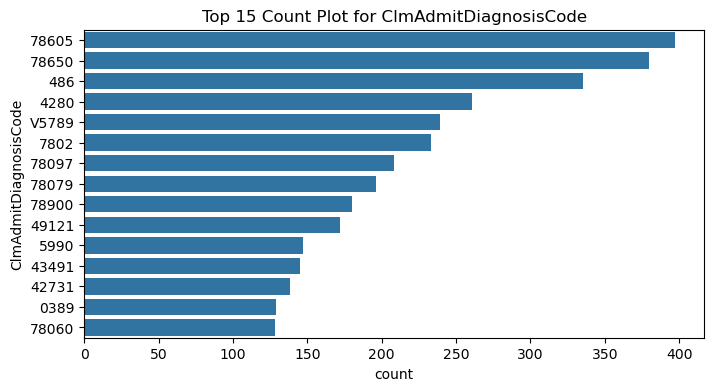

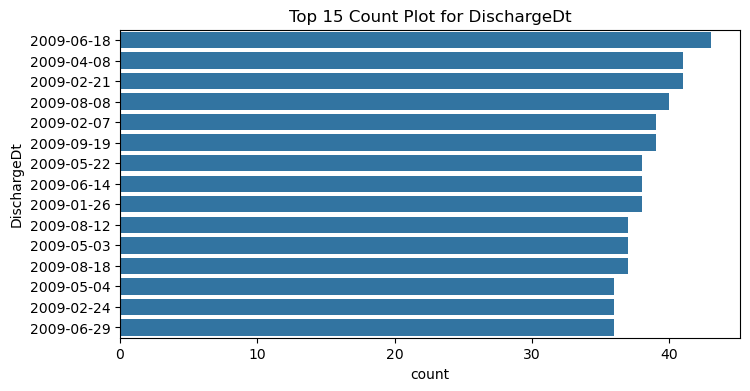

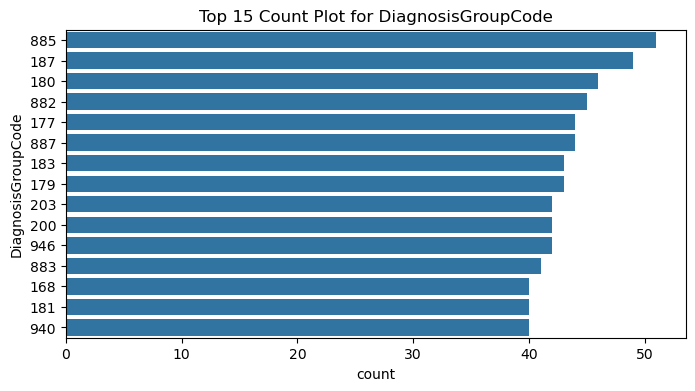

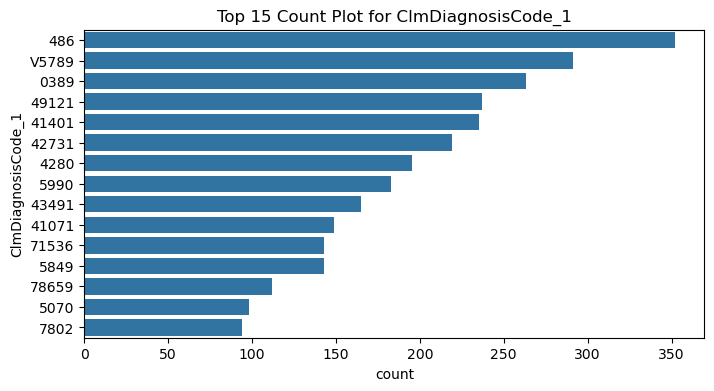

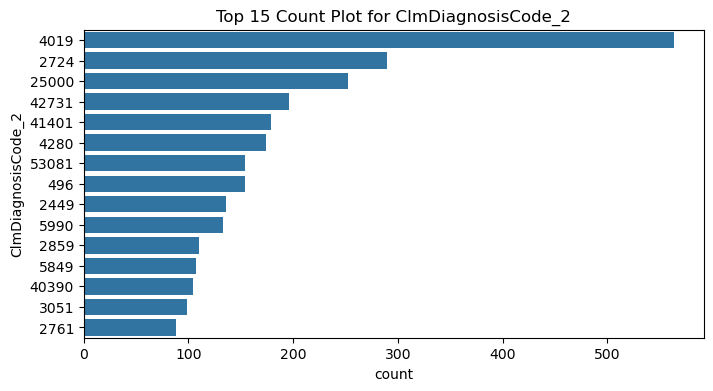

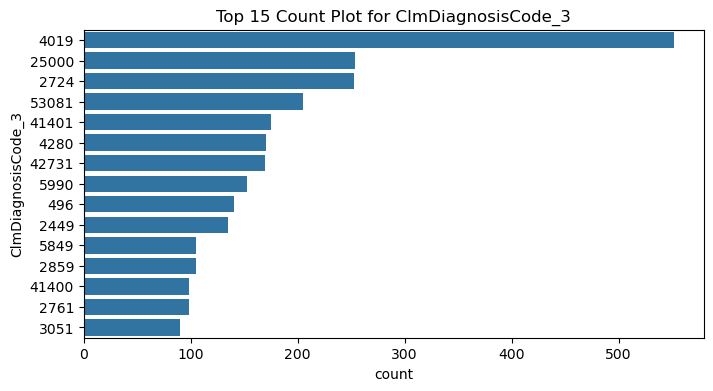

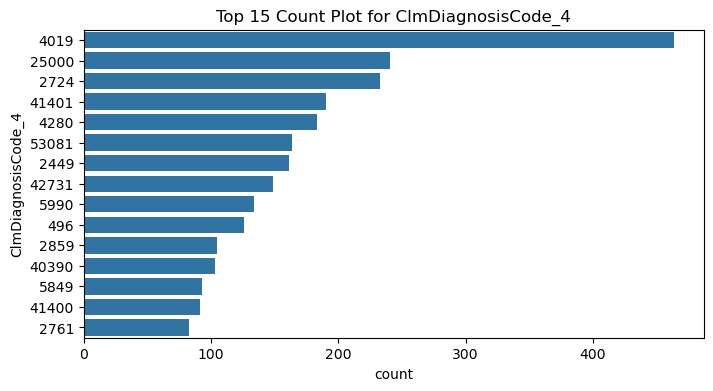

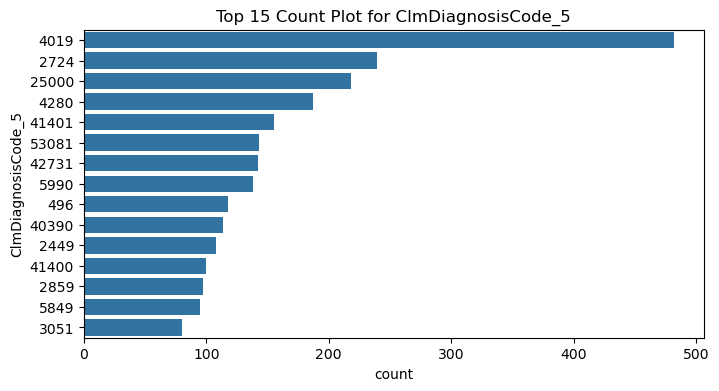

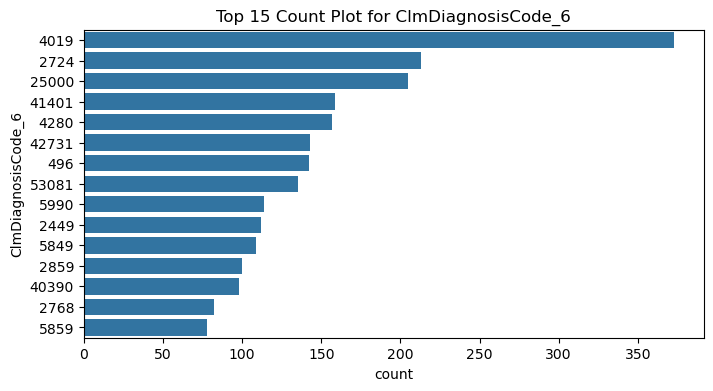

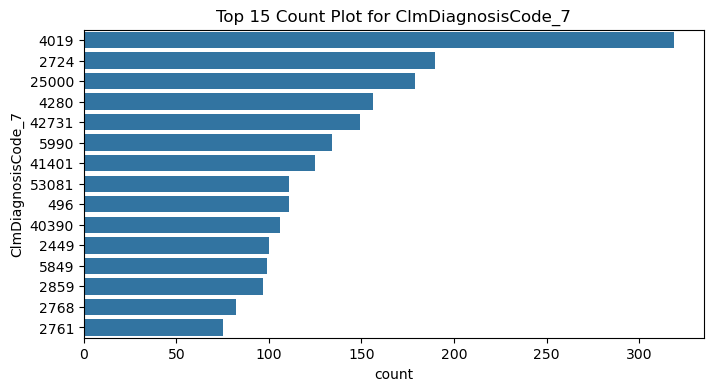

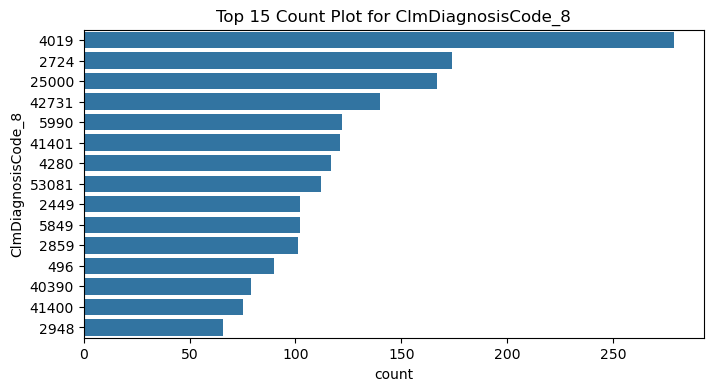

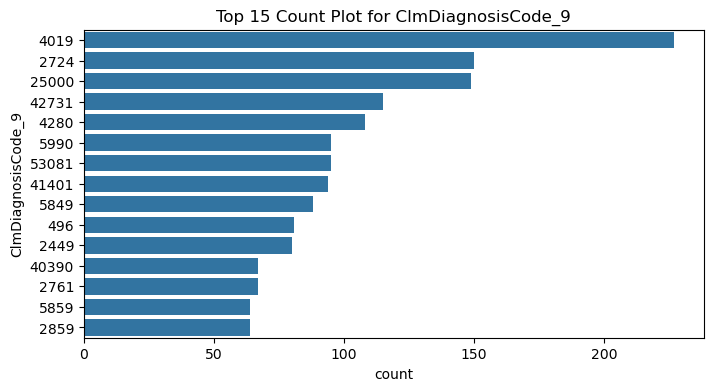

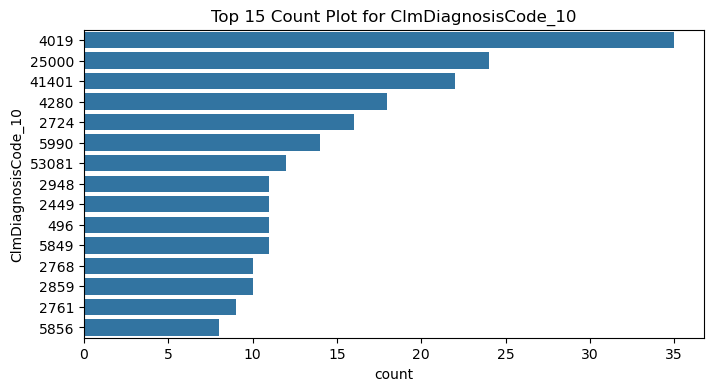


=====  DETECTING OUTLIERS =====

--- Outliers Detected ---
({'InscClaimAmtReimbursed': 704, 'DeductibleAmtPaid': 0, 'ClmProcedureCode_1': 0, 'ClmProcedureCode_2': 142, 'ClmProcedureCode_3': 10, 'ClmProcedureCode_4': 2, 'ClmProcedureCode_5': 0, 'ClmProcedureCode_6': 0}, nan)


In [50]:
print("\n### TEST DATA EDA ###")

full_eda(df)





### TRAIN DATA EDA ###

###  DATA INSPECTION ###

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGro

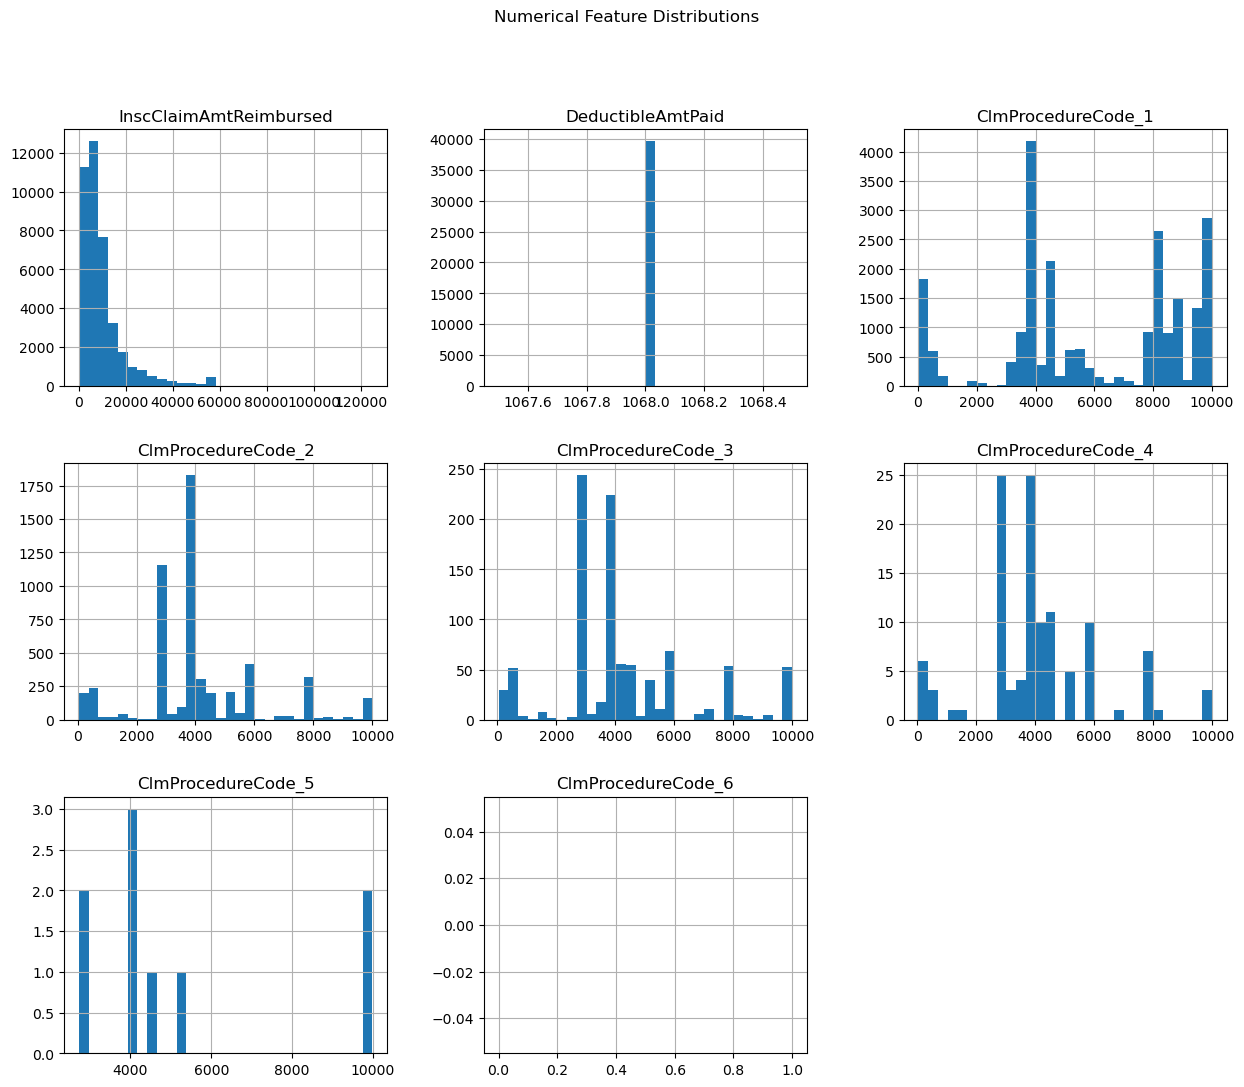


===== BOXPLOT =====


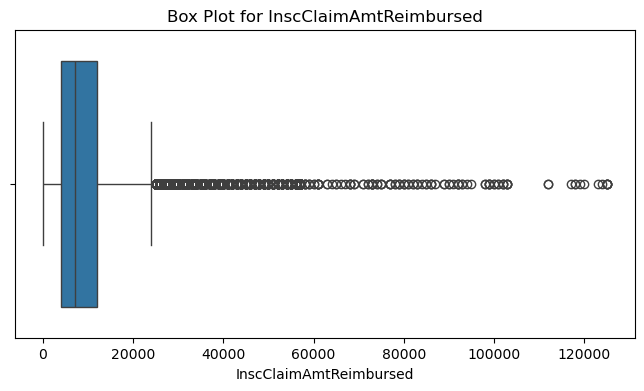

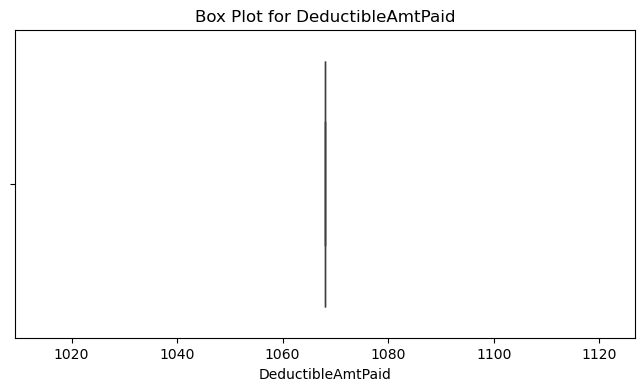

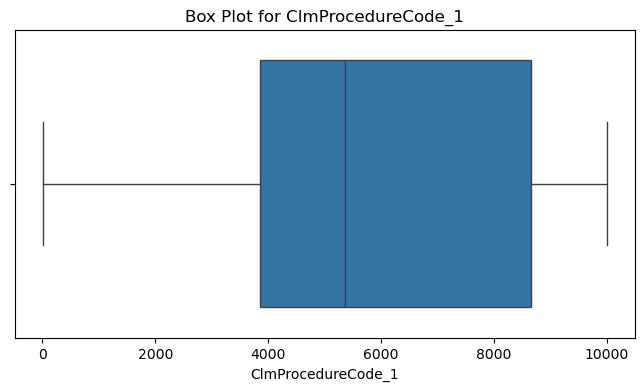

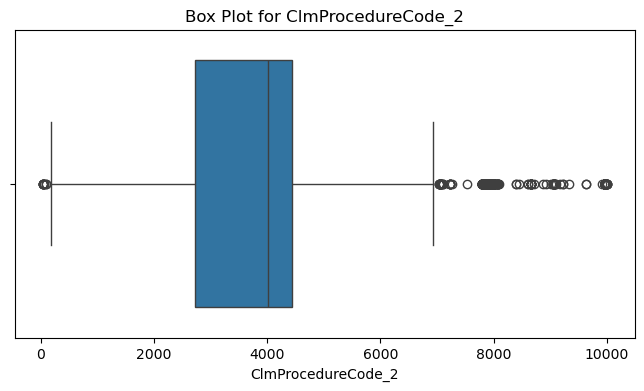

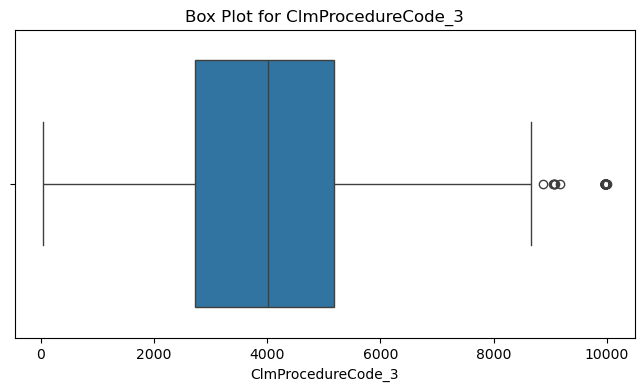

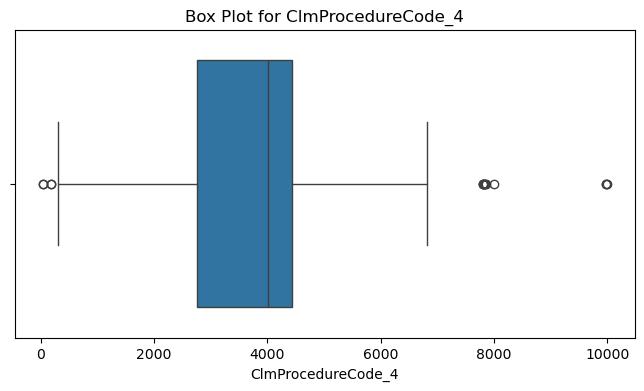

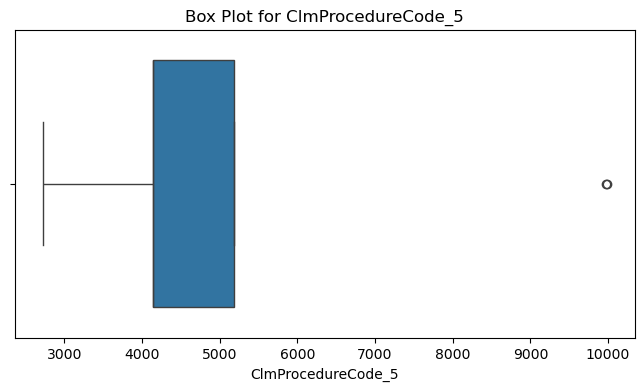


=====  PLOTTING CATEGORICAL DISTRIBUTIONS =====


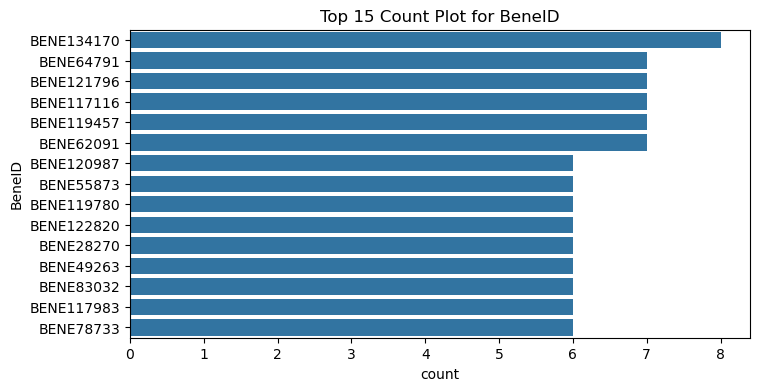

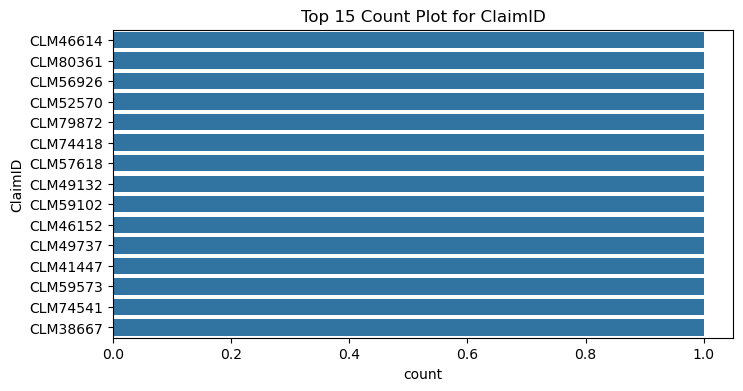

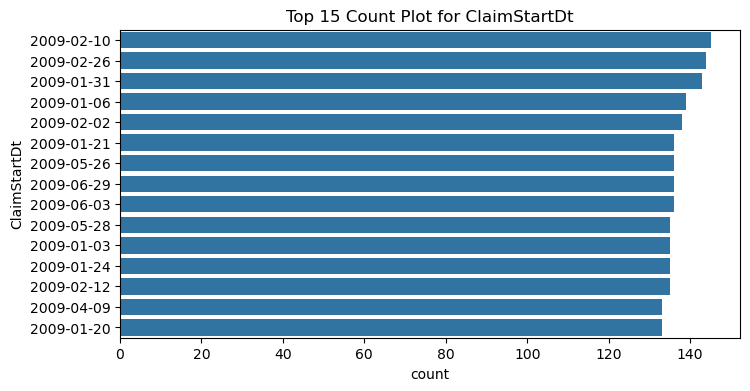

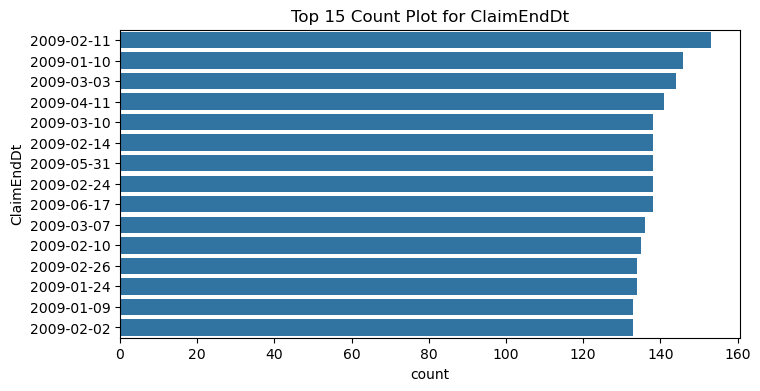

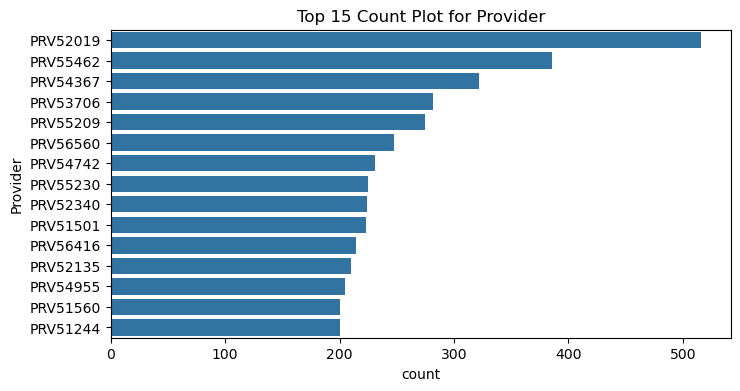

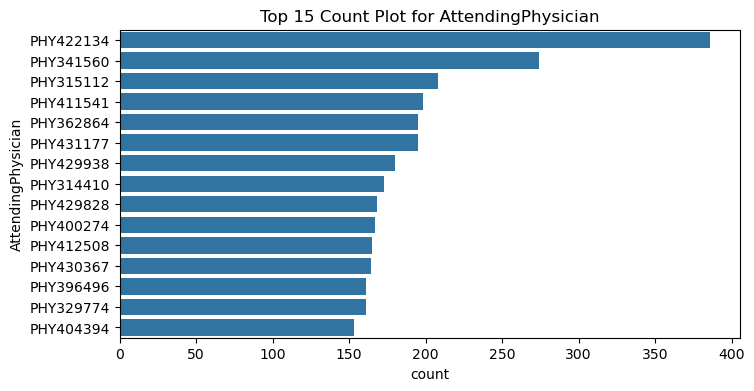

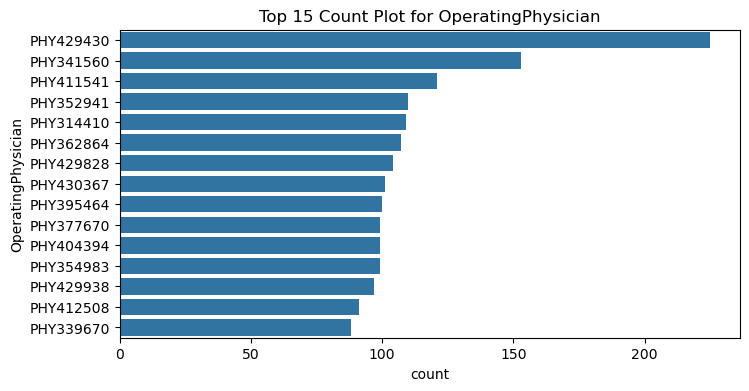

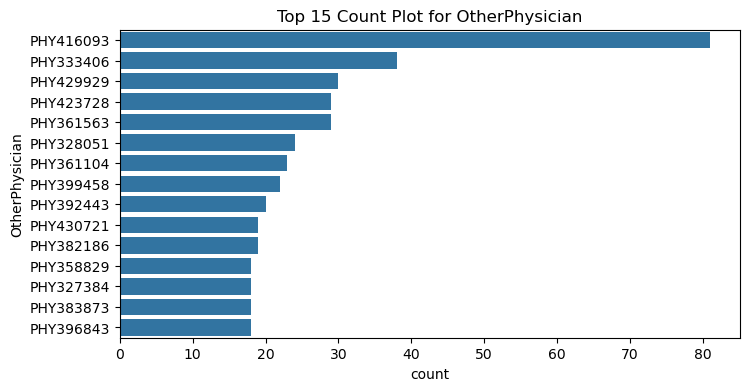

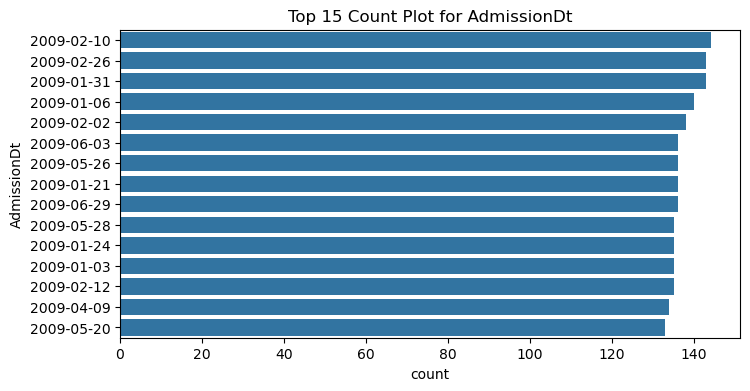

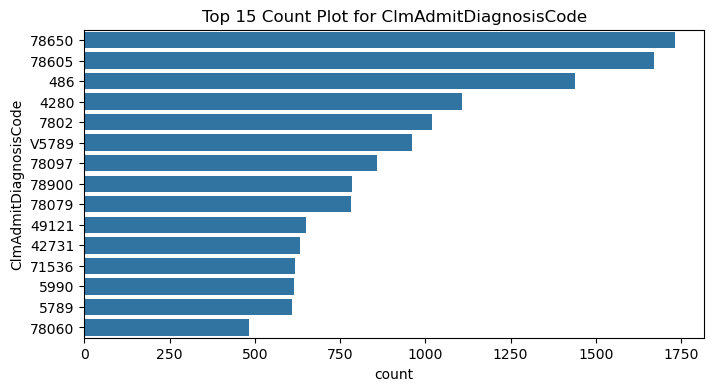

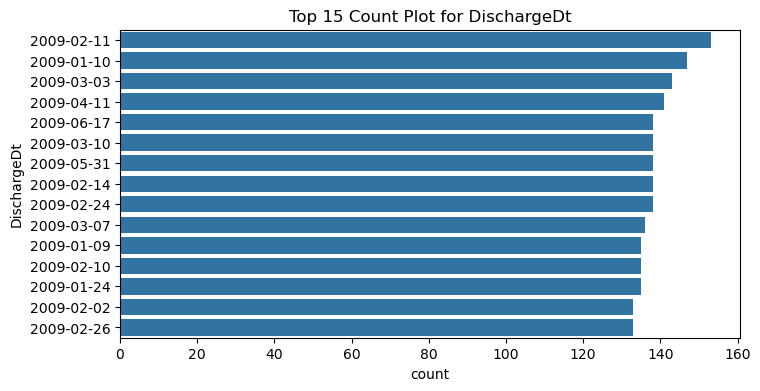

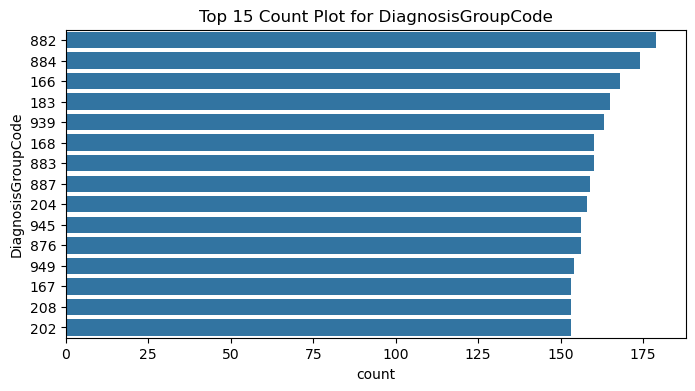

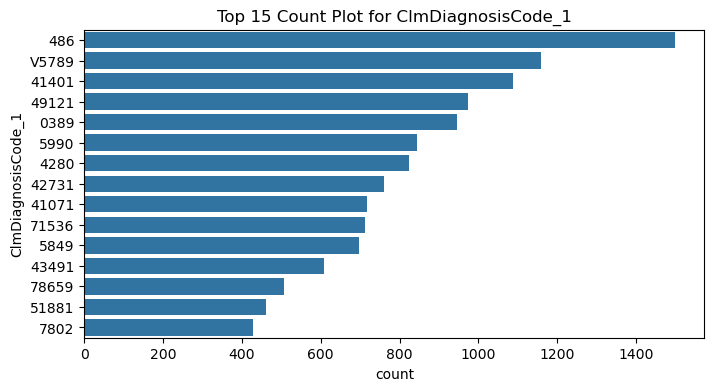

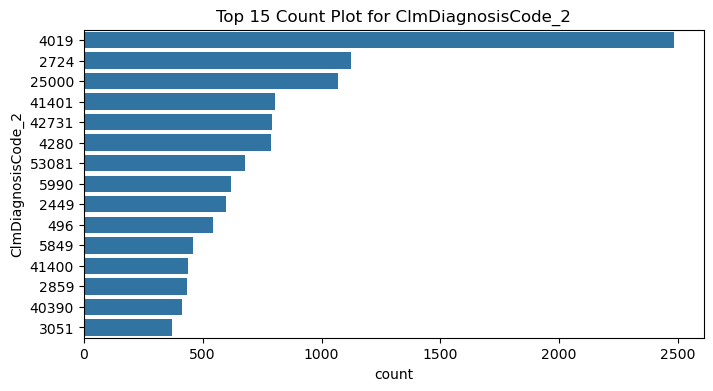

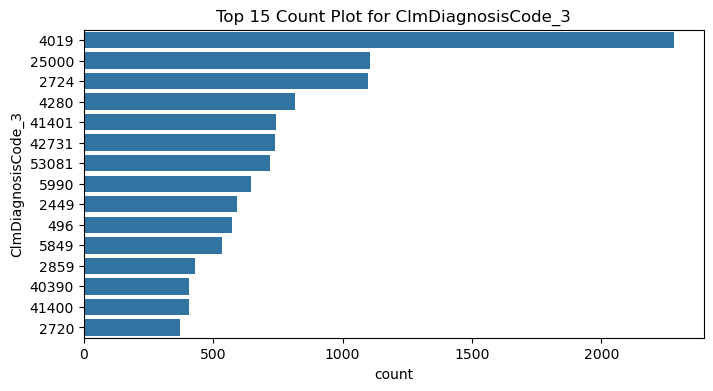

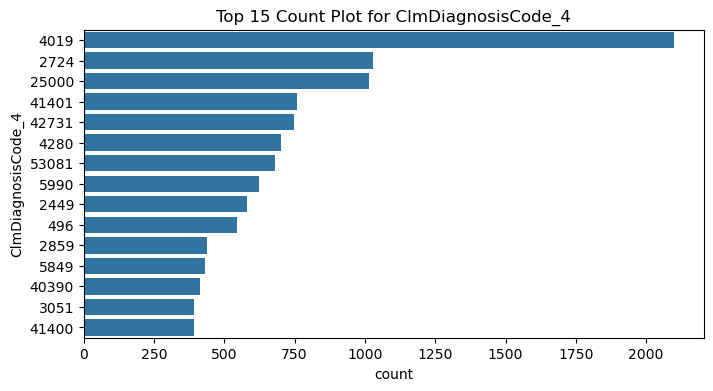

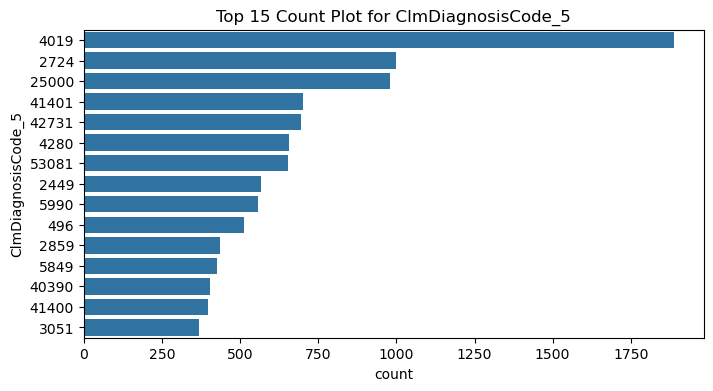

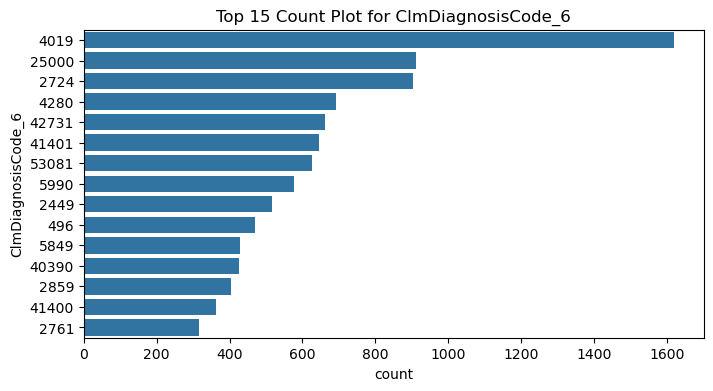

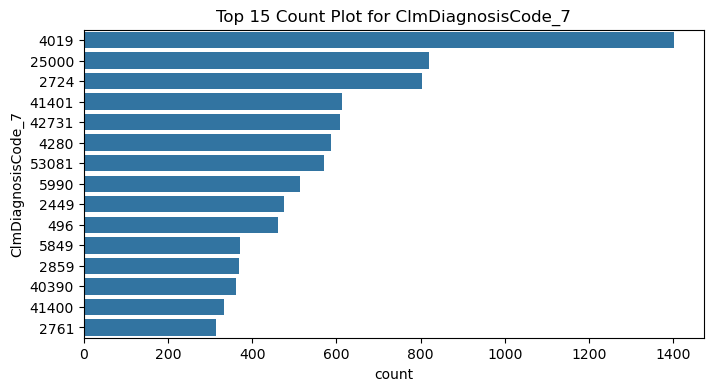

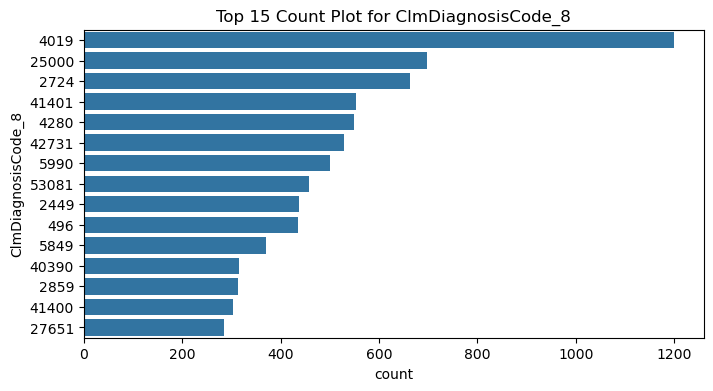

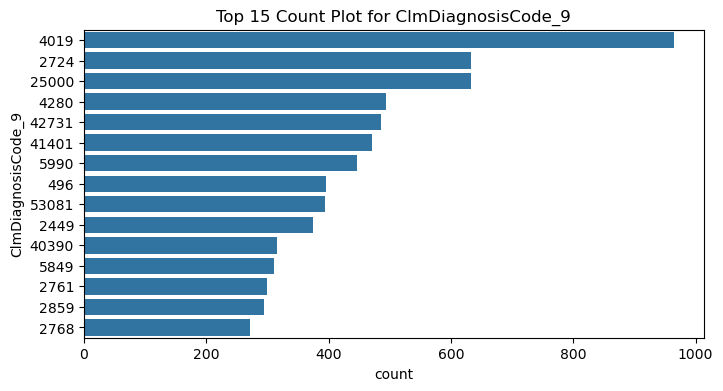

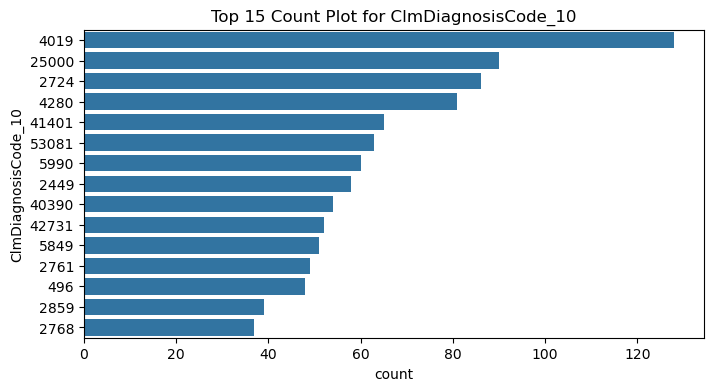


=====  DETECTING OUTLIERS =====

--- Outliers Detected ---
({'InscClaimAmtReimbursed': 2966, 'DeductibleAmtPaid': 0, 'ClmProcedureCode_1': 0, 'ClmProcedureCode_2': 577, 'ClmProcedureCode_3': 59, 'ClmProcedureCode_4': 15, 'ClmProcedureCode_5': 2, 'ClmProcedureCode_6': 0}, nan)


In [51]:
print("\n### TRAIN DATA EDA ###")

full_eda(df_train)


### APP DATA EDA ###

###  DATA INSPECTION ###

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50025 entries, 0 to 50024
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              50025 non-null  int64  
 1   BeneID                  50025 non-null  object 
 2   ClaimID                 50025 non-null  object 
 3   ClaimStartDt            50025 non-null  object 
 4   ClaimEndDt              50025 non-null  object 
 5   Provider                50025 non-null  object 
 6   InscClaimAmtReimbursed  50025 non-null  int64  
 7   AttendingPhysician      49882 non-null  object 
 8   OperatingPhysician      29419 non-null  object 
 9   OtherPhysician          5703 non-null   object 
 10  AdmissionDt             50025 non-null  object 
 11  ClmAdmitDiagnosisCode   50025 non-null  object 
 12  DeductibleAmtPaid       48930 non-null  float64
 13  DischargeDt   

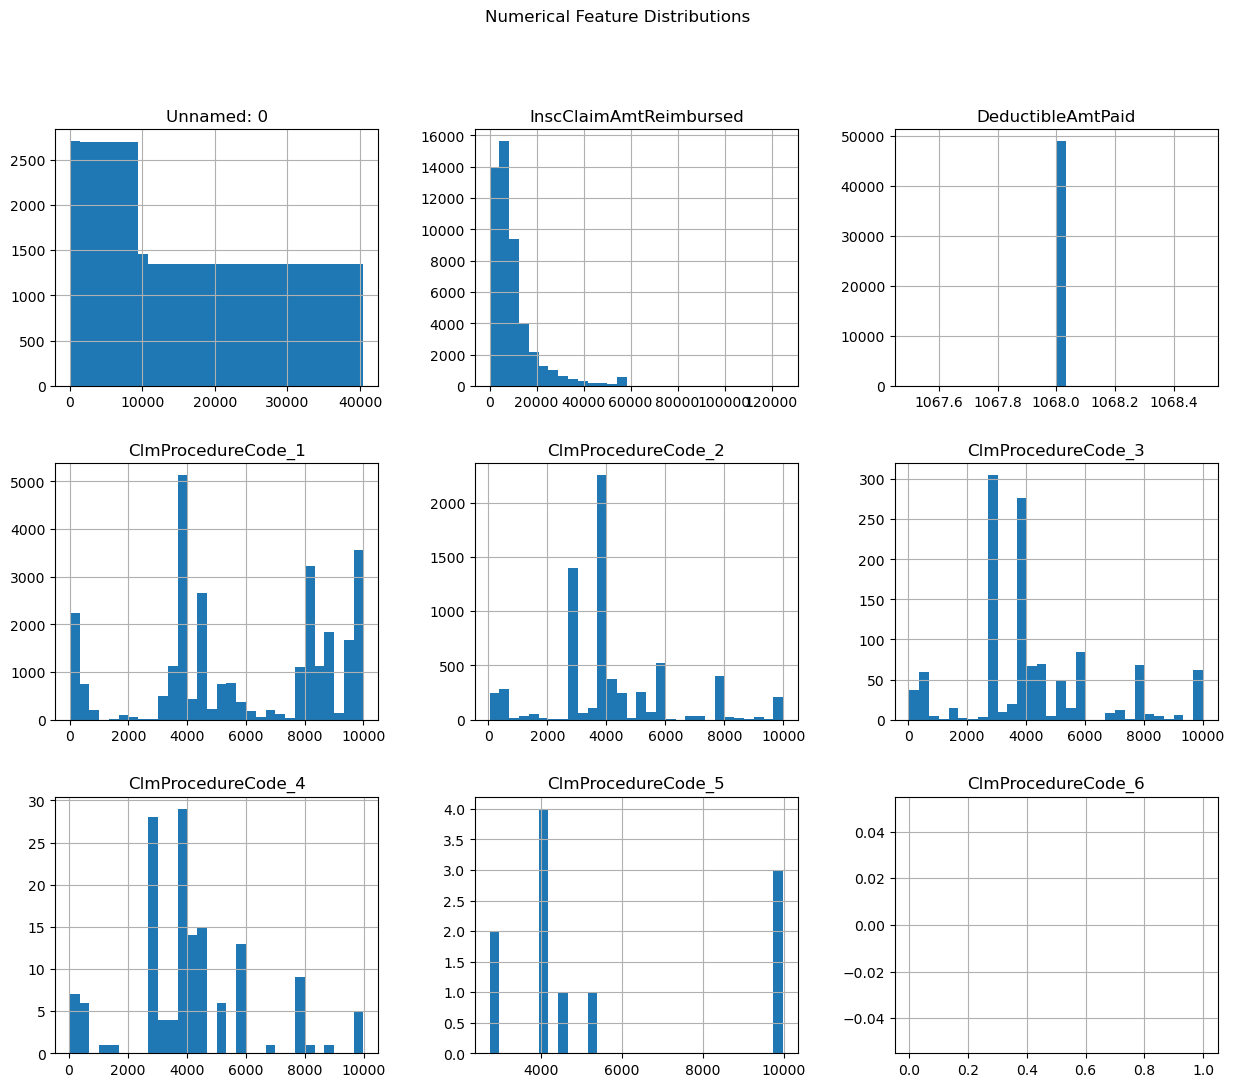


===== BOXPLOT =====


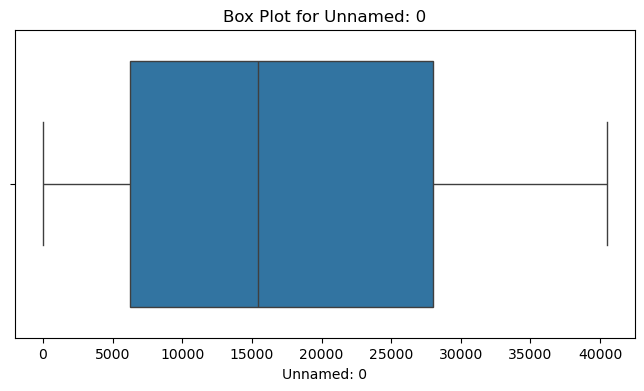

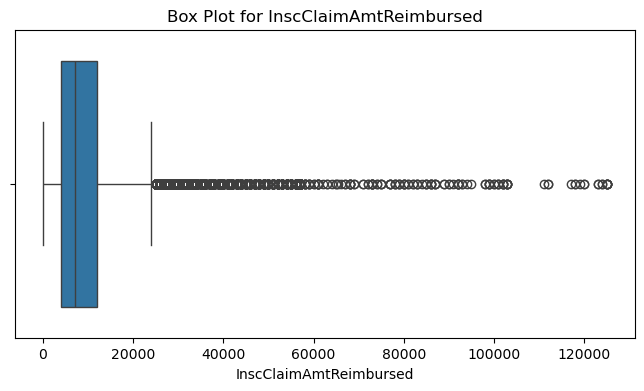

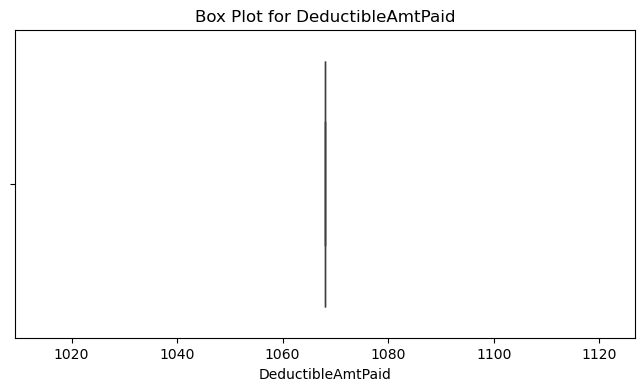

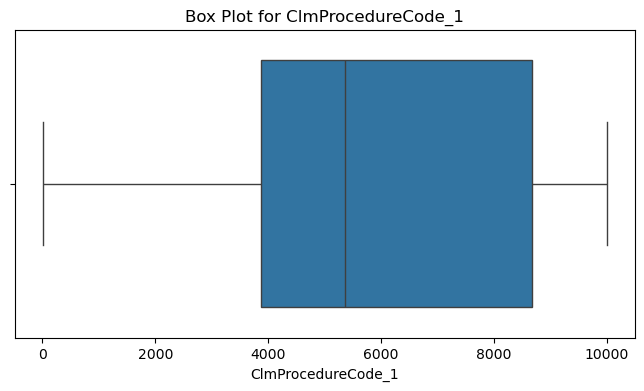

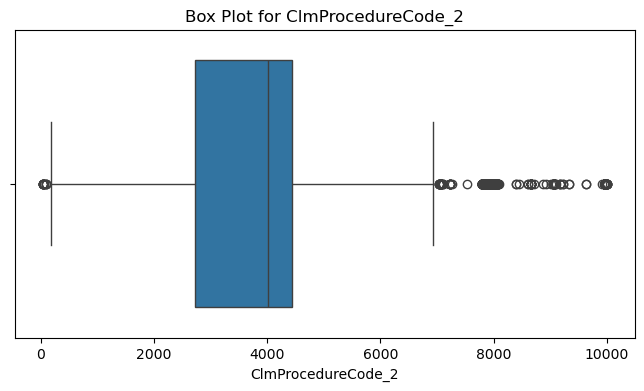

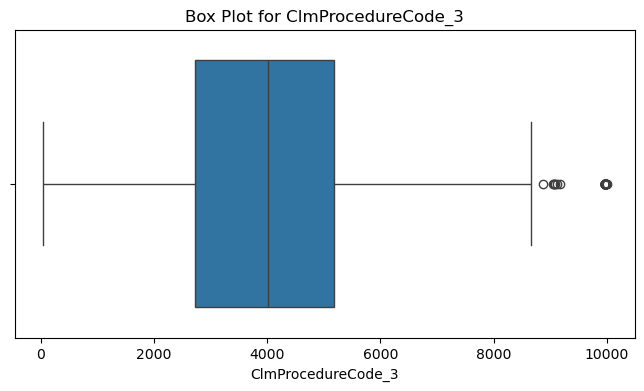

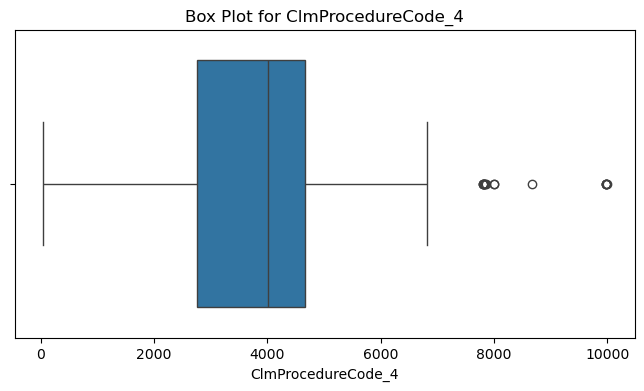

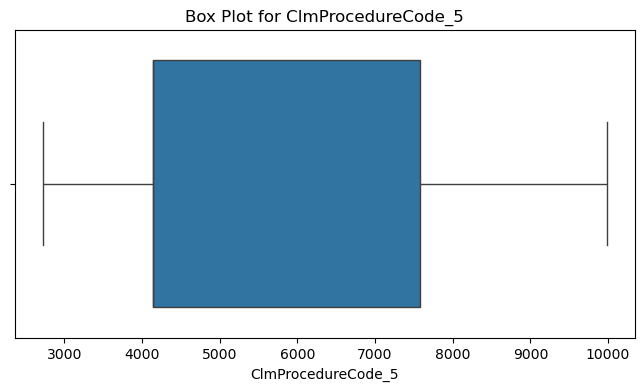


=====  PLOTTING CATEGORICAL DISTRIBUTIONS =====


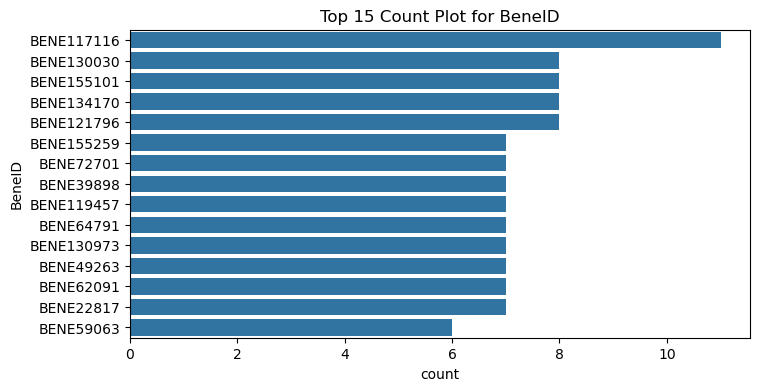

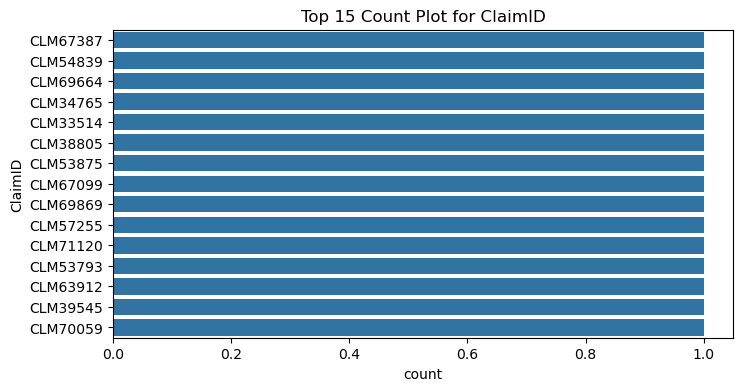

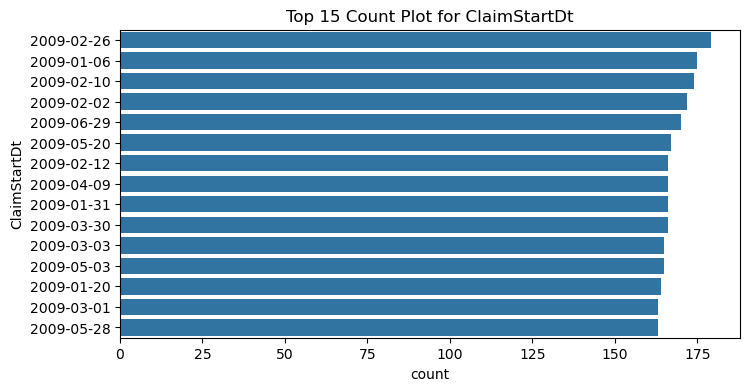

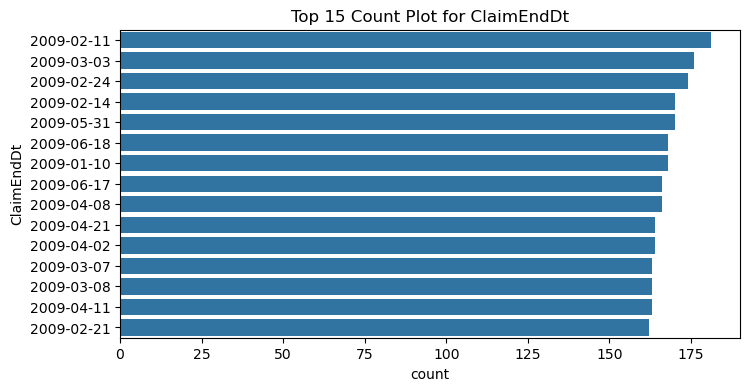

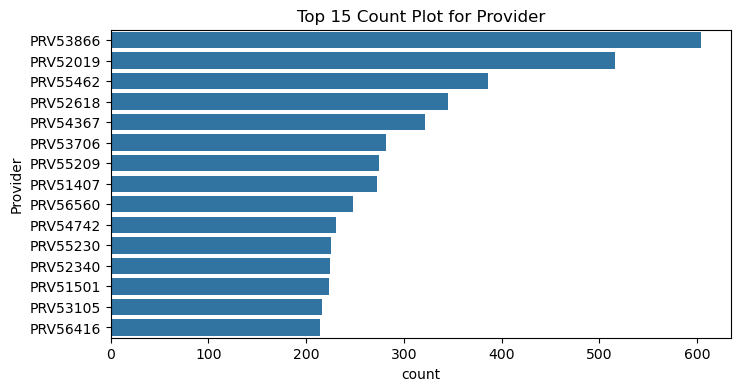

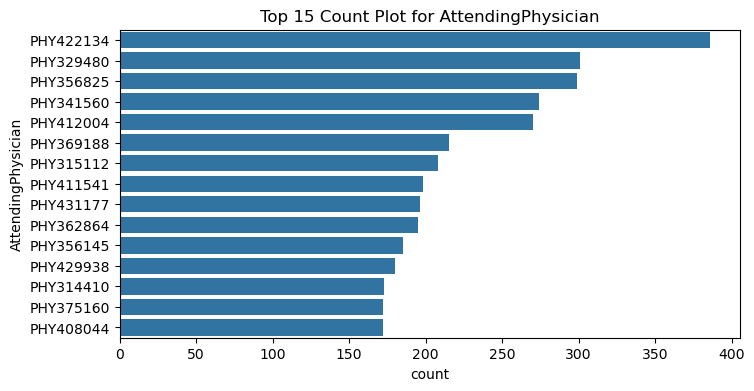

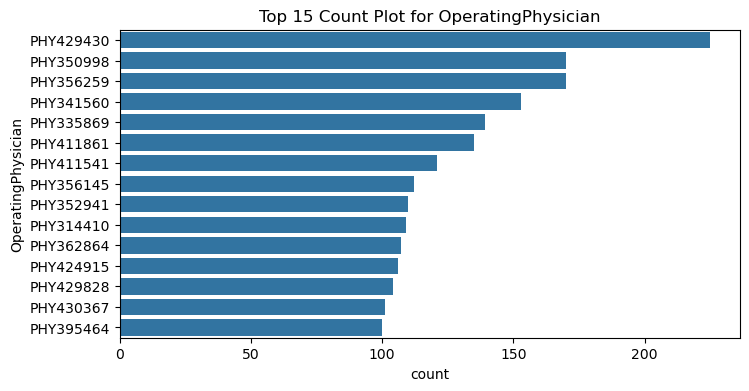

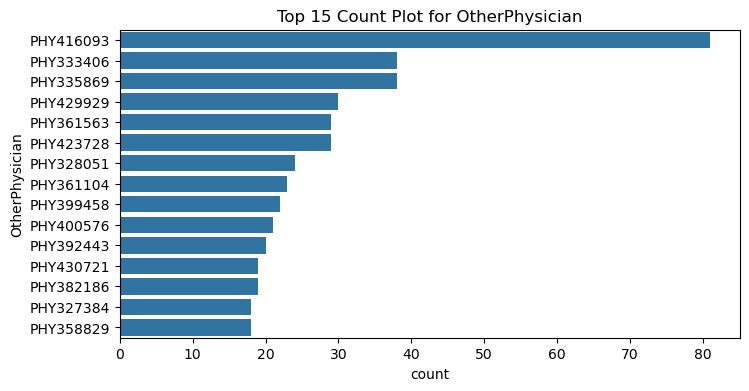

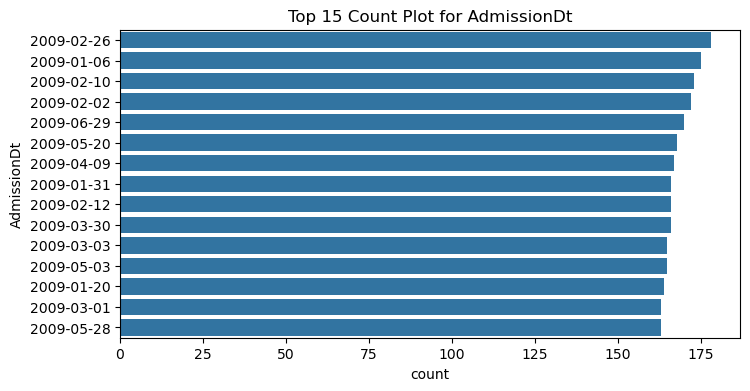

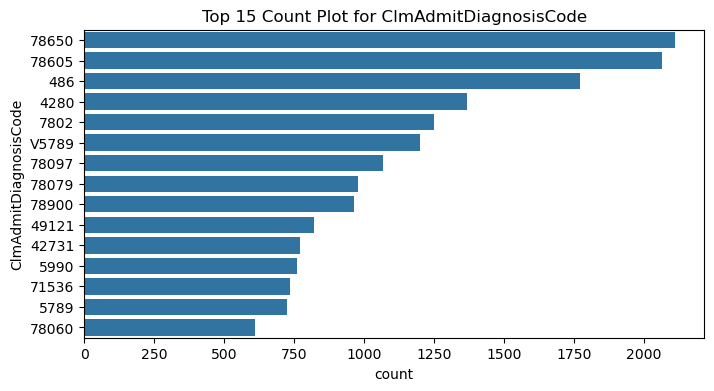

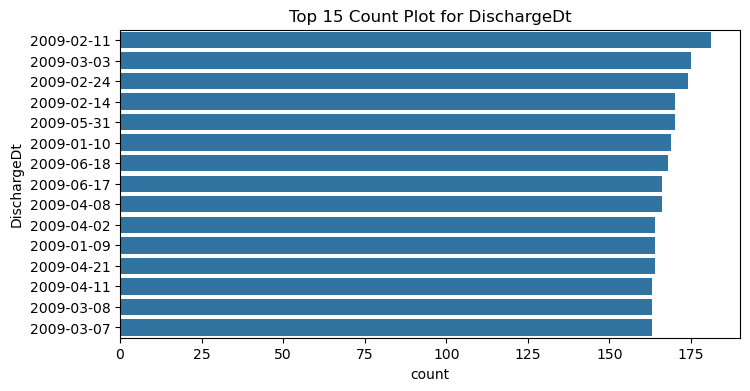

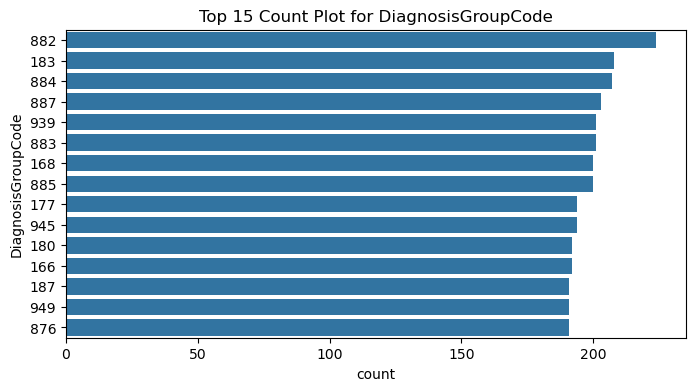

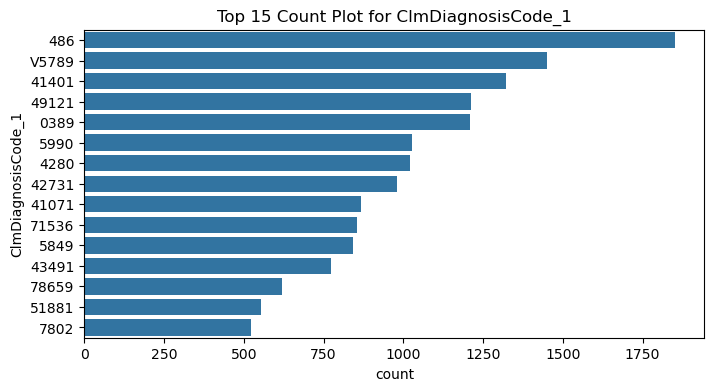

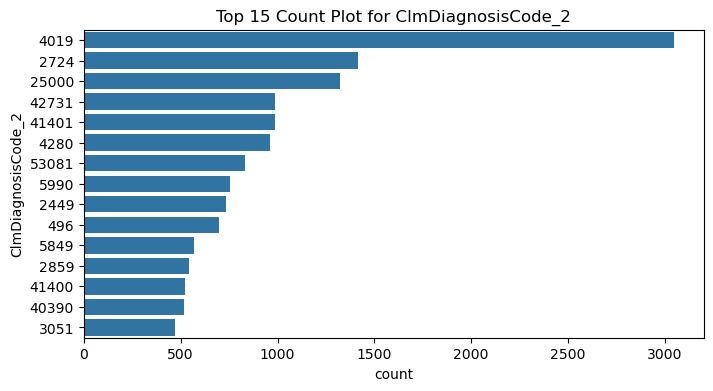

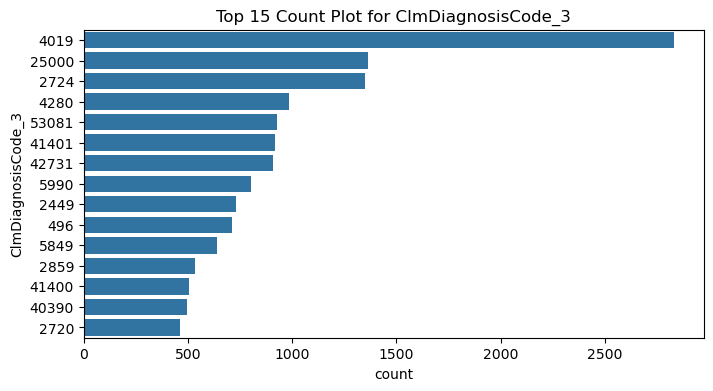

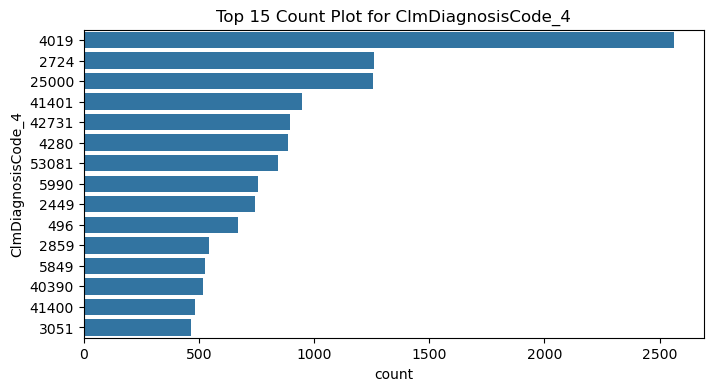

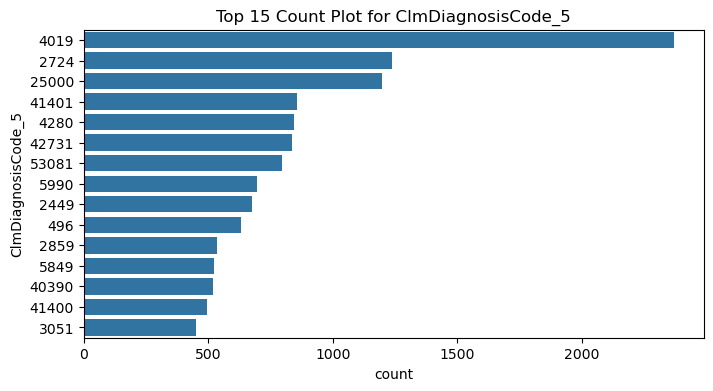

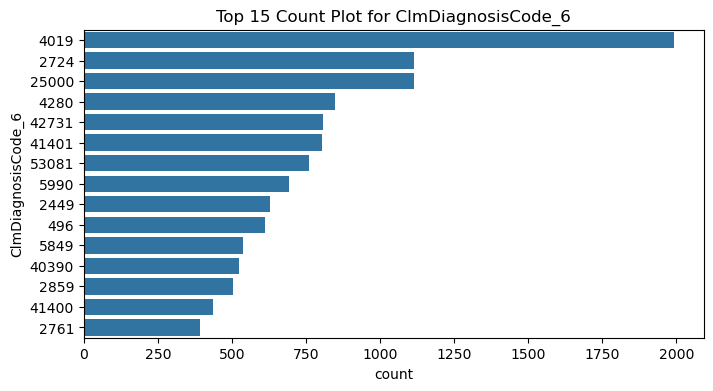

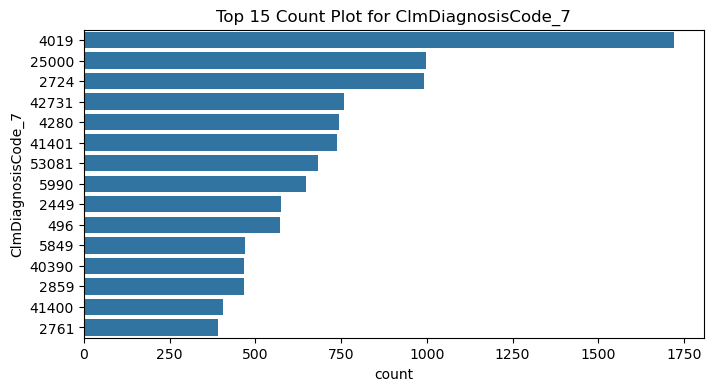

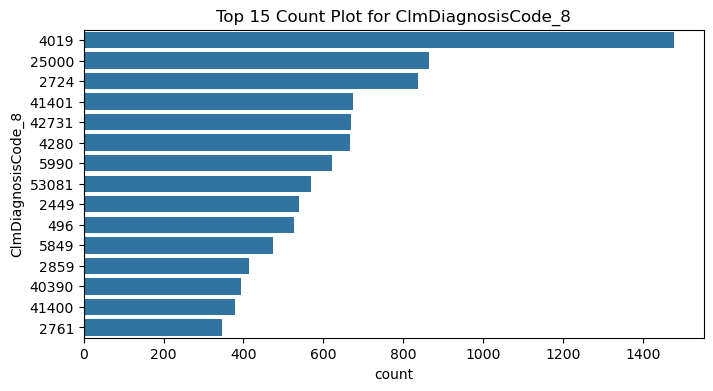

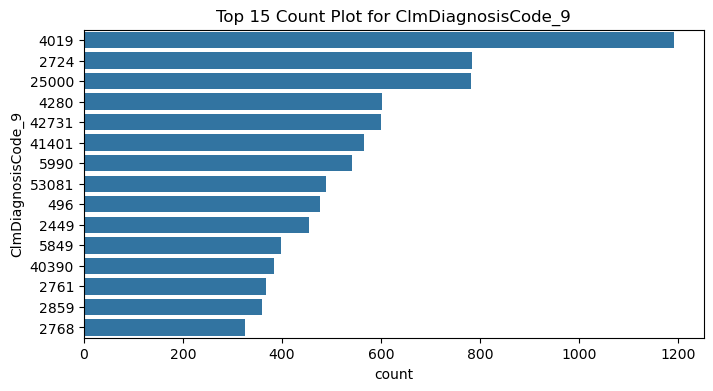

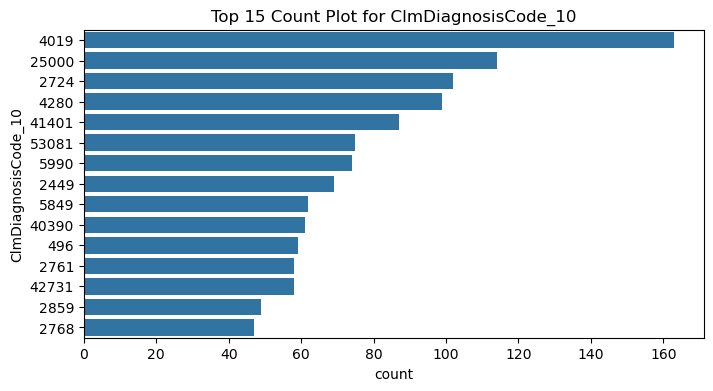


=====  DETECTING OUTLIERS =====

--- Outliers Detected ---
({'Unnamed: 0': 0, 'InscClaimAmtReimbursed': 3670, 'DeductibleAmtPaid': 0, 'ClmProcedureCode_1': 0, 'ClmProcedureCode_2': 715, 'ClmProcedureCode_3': 69, 'ClmProcedureCode_4': 16, 'ClmProcedureCode_5': 0, 'ClmProcedureCode_6': 0}, nan)


In [52]:
print("\n### APP DATA EDA ###")

full_eda(df_app)